In [1]:
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
import PIL.Image

In [3]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
# elif torch.backends.mps.is_available():
#     DEVICE = 'mps'
else:
    DEVICE = 'cpu'

print(f"Using {DEVICE} as device")

Using cpu as device


In [4]:
import os
os.chdir('../../stylegan2-ada-pytorch')

In [5]:
# Load model architecture
model_path = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/Stylegan2_Ada/Experiments/00002-stylegan2_ada_images-mirror-auto2-kimg1000-resumeffhq512/network-snapshot-000760.pkl"
with open(model_path, 'rb') as f:
    architecture = pickle.load(f)
    G = architecture['G_ema'].to(DEVICE)  # torch.nn.Module 
    D = architecture['D'].to(DEVICE)

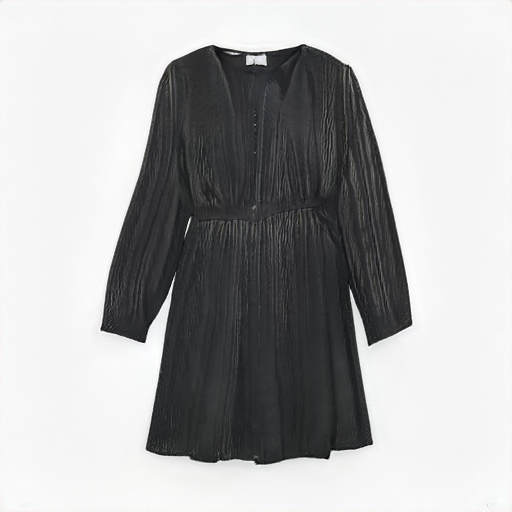

In [42]:
z = torch.randn([1, G.z_dim]).to(DEVICE)    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c,  force_fp32=True) 

img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB')